In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def convolucaoMediana(imagem, tamKernel):
    borda = int((tamKernel-1)/2)
    convolucao = np.full((imagem.shape[0]+(borda*2), imagem.shape[1]+(borda*2)), 0)
    
    for i in range(borda, imagem.shape[0]-borda):
        for j in range(borda, imagem.shape[1]-borda):
            convolucao[i-borda, j-borda] = np.sort(imagem[i-borda: i+borda+1, j-borda: j+borda+1].flatten())[int(((tamKernel**2)-1)/2)]
    
    return convolucao

# convolução com filtro da média e laplaciano
def convolucao(imagem, kernel):
    borda = int((kernel.shape[0]-1)/2)
    kernel = np.flipud(np.fliplr(kernel))
    convolucao = np.full((imagem.shape[0]+(borda*2), imagem.shape[1]+(borda*2)), 0)
    
    for i in range(borda, imagem.shape[0]-borda):
        for j in range(borda, imagem.shape[1]-borda):
            convolucao[i,j] = np.sum(kernel*imagem[i-borda:i+borda+1, j-borda:j+borda+1])

    return convolucao
    
imagem = cv2.imread('Fig0304.tif', cv2.IMREAD_GRAYSCALE)
kernelMedia = np.ones((3,3))/(3**2)
kernelLaplaciano = np.array([[1,1,1],
                             [1,-8,1],
                             [1,1,1]])

imagemConvMediana = convolucaoMediana(imagem, 3)
imagemConvMedia = convolucao(imagem, kernelMedia)
imagemConvLaplaciana = convolucao(imagem, kernelLaplaciano)

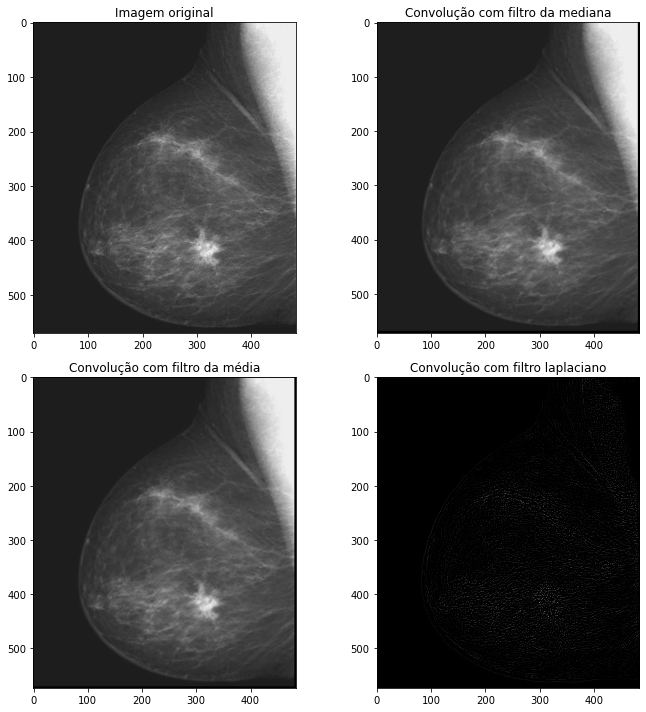

In [4]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.title('Imagem original')
plt.imshow(imagem, cmap="gray", vmin=0, vmax=255)

plt.subplot(222)
plt.title('Convolução com filtro da mediana')
plt.imshow(imagemConvMediana, cmap="gray", vmin=0, vmax=255)

plt.subplot(223)
plt.title('Convolução com filtro da média')
plt.imshow(imagemConvMedia, cmap="gray", vmin=0, vmax=255)

plt.subplot(224)
plt.title('Convolução com filtro laplaciano')
plt.imshow(imagemConvLaplaciana, cmap="gray", vmin=0, vmax=255)

plt.tight_layout()